## Linear Regression

#### Normal Equation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [16]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

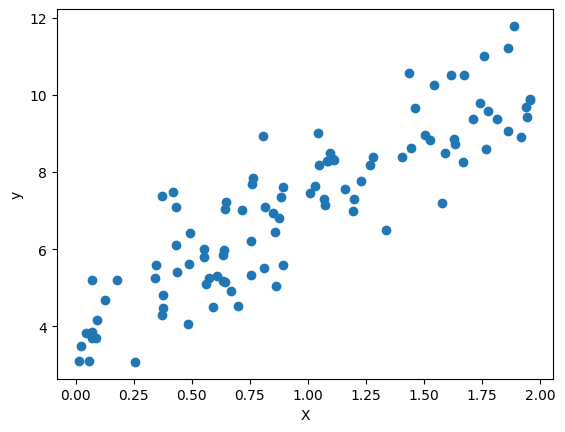

In [17]:
plt.scatter(x=X, y=y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
X_b = np.c_[np.ones_like(X), X]

In [19]:
#using normal equation to find the best theta to minimize the cost function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.95781245],
       [3.26140773]])

In [20]:
X_ = np.array([[0], [2]])
X_ = np.c_[np.ones_like(X_), X_].T
X_.shape

(2, 2)

In [21]:
y_hat = np.matmul(theta_best.T, X_)

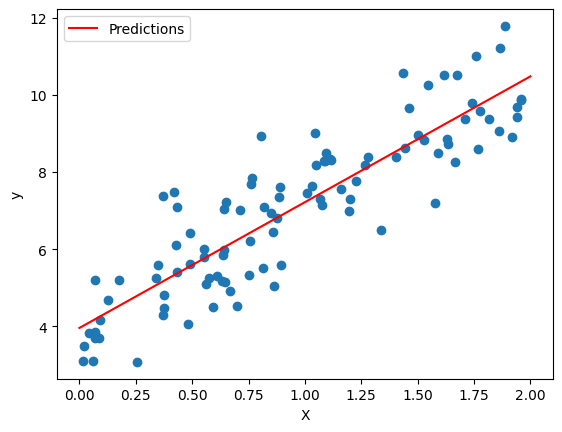

In [22]:
plt.scatter(x=X, y=y)
plt.plot([0,2], y_hat.flatten(), color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Linear Regression using scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lin_reg = LinearRegression(n_jobs=-1)

In [25]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.95781245]), array([[3.26140773]]))

In [26]:
lin_reg.predict(np.array([[0],[2]]))

array([[ 3.95781245],
       [10.4806279 ]])

In [27]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.95781245],
       [3.26140773]])

In [28]:
np.linalg.pinv(X_b).dot(y)

array([[3.95781245],
       [3.26140773]])

#### Gradient Descent